# 회귀분석 6장
> 회귀분석 6장 숙제 풀이

- toc:true
- branch: master
- badges: true
- comments: true
- author: 김동준
- categories : ["R", "회귀분석"]

# 6.2
> 다음 자료는 A 제품을 생산하는 공장의 총자산(x)과 총수입(y)과의 관계를 조사한 표이다.

|x|25|6|8|5|1|24|17|2|13|14|
|---|---|---|---|---|---|---|---|---|---|---|
|y|10.1|2.9|3.0|1.8|0.1|9.4|6.9|0.3|5.1|6.0|

### 1) 산점도를 그리고, 적합한 모형을 설정하여라.

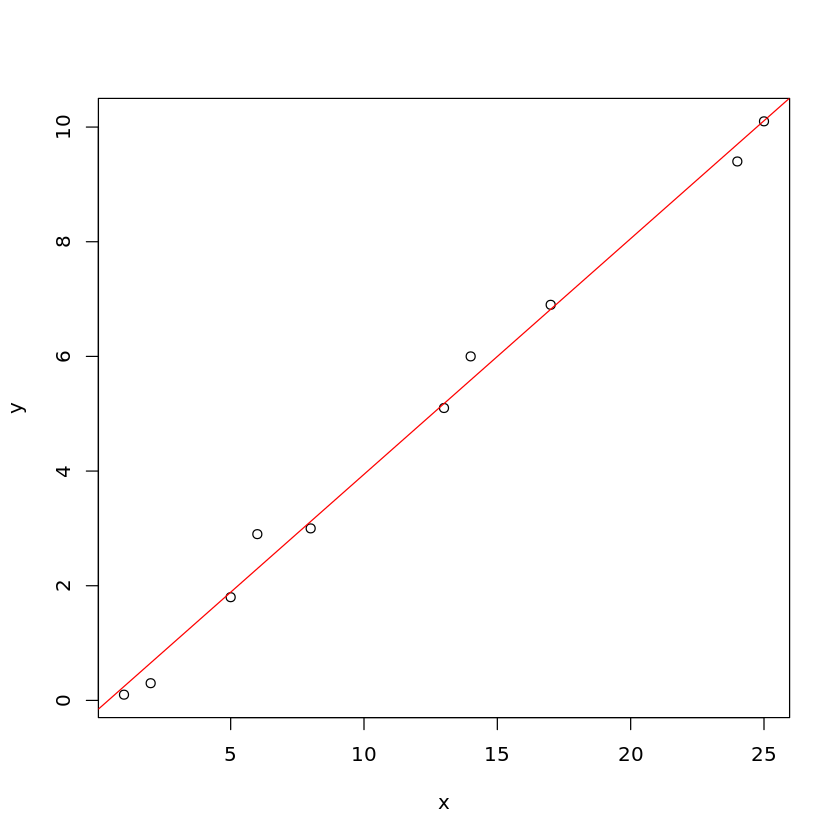

In [36]:
x <- c(25,6,8,5,1,24,17,2,13,14)
y <- c(10.1,2.9,3.0,1.8,0.1,9.4,6.9,0.3,5.1,6.0)
plot(x,y)
lm62<-lm(y~x)
abline(lm62,col='red')

> 적합한 모형은 1차선형회귀모형이다.

### 2) 원점을 지나는 회귀모형 $y=\beta_1x + \epsilon$ 을 적합시키고 분산분석표를 작성하여 귀무가설 $H_0 : \beta_1 = 0 $ 을 검정하여라. $\alpha = 0.05 $

b1 구하기

In [49]:
sum(x*y)/sum(x^2) #기울기 구하기

[1] 0.4014106

b1(기울기) 값은 0.401410579345088 이다.

불편 추정량: yhat = 0.401410579345088*x

In [50]:
yhat = 0.401410579345088*x

In [52]:
y-0.401410579345088*x #잔차구하기

[1]  0.06473552  0.49153652 -0.21128463 -0.20705290 -0.30141058 -0.23385390
 [7]  0.07602015 -0.50282116 -0.11833753  0.38025189

In [53]:
sum(y-0.401410579345088*x) #잔차의 합이 0이 아니다.

[1] -0.5622166

영가설 $H_0 :  \beta_1 = 0$  검정

회귀모형의 변동 (F 통계량 구하기)

In [54]:
SST = sum(y^2)
SSR = sum(yhat^2)
SSE = SST - SSR
MSE = SSE/(length(x)-1)
F0 = (SSR)/(SSE/(length(x)-1))
F0

[1] 3212.538

F 통계량은 3212.53761820648 이고  유의수준 0.05일때 자유도 1,9인 F값은 3.26 이므로 영가설 $H_0$를 기각한다.

즉, x는 y에 영향을 끼친다.

### 3) 단순회귀모형 $y=\beta_0 + \beta_1x+\epsilon$을 적합시키고 결정계수 $R^2$ 을 계산하여라.

단순회귀모형 적합

In [41]:
coef(lm62)

(Intercept)           x 
 -0.1684528   0.4111698

> $\beta_0 = -0.168452830188679 , \beta_1 = 0.411169811320755 $

> 단순회귀모형 : $y = -0.168452830188679 + 0.411169811320755x$

In [7]:
summary(lm62)$r.squared #결정계수

[1] 0.9928961

> 결정계수가 1에 굉장히 가까운 것으로 보아 관계를 설명하기 굉장히 좋은 모형이다.

__________________________

# 6.5
> 다음 표는 남녀 어린이 각각 16명에게 비타민B를 복용시켰을 때 4주간의 성장률에 관한 자료이다.

|남|  |여|  |
|:---:|:---:|:---:|:---:|
|성장률(y)|복용량(x)|성장률(y)|복용량(x)|
|17.1|0.301|18.5|0.301|
|14.3|0.301|22.1|0.301|
|21.6|0.301|15.3|0.301|
|24.5|0.602|23.6|0.602|
|20.6|0.602|26.9|0.602|
|23.8|0.602|20.2|0.602|
|27.7|0.903|24.3|0.903|
|31.0|0.903|27.1|0.903|
|29.4|0.903|30.1|0.903|
|30.1|1.204|28.1|0.903|
|28.6|1.204|30.3|1.204|
|34.2|1.204|33.0|1.204|
|37.3|1.204|35.8|1.204|
|33.3|1.505|32.6|1.505|
|31.8|1.505|36.1|1.505|
|40.2|1.505|30.5|1.505|


### 1) 주어진 자료에 $y=\beta_0 +\beta_1x + \epsilon$ 이 성립한다고 가정하고 남녀 어린이 각각의 경우에 회귀선을 추정하여라.

남자 어린이의 경우

In [15]:
eatboy <- c(0.301,0.301,0.301,0.602,0.602,0.602,0.903,0.903,0.903,1.204,1.204,1.204,1.204,1.505,1.505,1.505)
growboy <- c(17.1,14.3,21.6,24.5,20.6,23.8,27.7,31.0,29.4,30.1,28.6,34.2,37.3,33.3,31.8,40.2)
lmboy <- lm(growboy~eatboy)
coef(lmboy)

(Intercept)      eatboy 
   14.17758    14.82533

> 남자어린이의 추정된 회귀선은 $y = 14.1775757575758 + 14.8253297090506x $ 이다.

여자 어린이의 경우

In [16]:
eatgirl <- c(0.301,0.301,0.301,0.602,0.602,0.602,0.903,0.903,0.903,0.903,1.204,1.204,1.204,1.505,1.505,1.505)
growgirl <- c(18.5, 22.1,15.3 ,23.6 ,26.9 ,20.2 ,24.3 ,27.1 ,30.1 ,28.1 ,30.3 , 33.0,35.8 ,32.6 ,36.1 ,30.5)
lmgirl <- lm(growgirl~eatgirl)
coef(lmgirl)

(Intercept)     eatgirl 
   15.65625    12.73533

> 여자어린이의 추정된 회귀선은 $y = 15.65625 +12.7353266888151x $ 이다.

### 2) 두 개의 추정된 회귀선을 같은 평면상에 나타내어 비교해 보라.

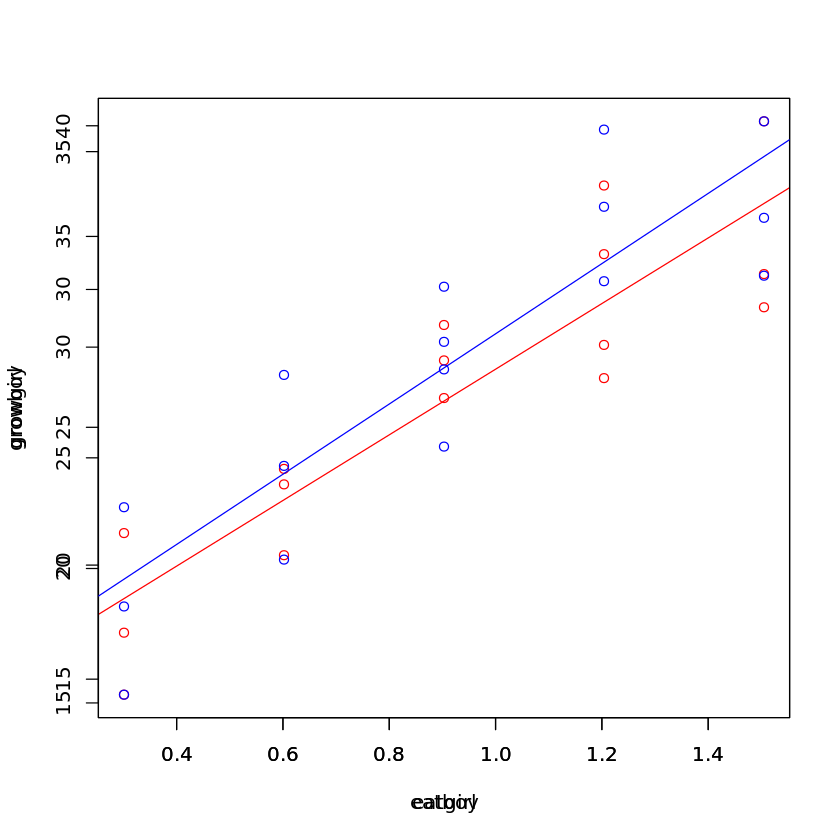

In [17]:
plot(growboy~eatboy,col="red")
abline(lmboy,col='red')
par(new = T)
plot(growgirl~eatgirl,col='blue')
abline(lmgirl,col='blue')

### 3) 두 회귀직선의 기울기가 같은지 검정하여라. $\alpha = 0.05 $

In [18]:
boycoef <- summary(lmboy)$coefficients
girlcoef <- summary(lmgirl)$coefficients
db <- (girlcoef[2,1]-boycoef[2,1]) #두 기울기의 차이
sd <- sqrt(girlcoef[2,2]^2+boycoef[2,2]^2) #두 기울기의 분산 합
df <- (lmboy$df.residual+lmgirl$df.residual) #자유도
td <- (abs(db/sd)) #t 통계량
2*pt(-td,df) #유의확률

[1] 0.4323564

> 기울기의 검정 $H_0 : \beta_{1boy} = \beta_{1girl}$ 에 대한 유의확률이 0.43 이므로 영가설을 기각할 수 없다. 동일한 기울기로 볼 수있다.

### 4) 두 회귀직선의 동일성 여부를 검정하여라. $\alpha = 0.05 $

In [23]:
anova(lmboy)
anova(lmgirl)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
eatboy,1,616.0656,616.06556,58.36567,2.331699e-06
Residuals,14,147.7738,10.55527,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
eatgirl,1,440.8333,440.83333,52.03501,4.469824e-06
Residuals,14,118.6060,8.47186,NA,NA


분산분석표에서 완전모형의 잔차제곱합

$SSE(F) = SSE_1 + SSE_2 = 147.7738 + 118.6060 = 266.3798$

자유도 : $df_F = 14 + 14 =28 $

In [33]:
eatbar <- (1/(length(eatboy)*2))*(sum(eatboy)+sum(eatgirl))
growbar <- (1/(length(eatboy)*2))*(sum(growboy)+sum(growgirl))
sum((eatboy-eatbar)*(growboy-growbar))+sum((eatgirl-eatbar)*(growgirl-growbar))/(sum((eatboy-eatbar)^2)+(sum((eatgirl-eatbar)^2))) #b1(기울기)

[1] 47.88252

In [34]:
growbar-47.8825170071177*eatbar #b0 (절편)

[1] -16.18831

In [35]:
# yhat = -16.1883077830255 + 47.8825170071177*xij

> 

____________________

# 6.7

단순 회귀 모형에서 회귀제곱합

$SSR = y'[X(X'X)^{-1} - \frac{J}{n}]y = \sum_{}^{} (\hat{y_i}-\bar{y})^2$

의 기댓값을 [정리 6.4]를 이용하여 구하고 잔차제곱합

$ SSE = \sum_{i=1}^{n} (y_i - \hat{y_1})^2 $ = $ y'[I-X(X'X)^{-1} X'] y $

의 기댓값도 구하여 보아라

`-` [정리 6.4] : 만약 벡터 $y \sim N(\mu,V)$ 이면 ($V$는 분산공분산행렬)
> 1) $E(y'Ay) = tr(AV) + \mu'A\mu $ (이것은 y가 정규분포가 아닐 때도 성립)

> 2) $Cov(y,y'Ay) = 2VA\mu$

1)

$E(SSR) = E(y'Ay)    \to$ A = $ [X(X'X)^{-1} - \frac{J}{n}] $

$ V = I\sigma^2 $ 이므로

$E(SSR) = \sigma^2 tr(A) +\mu'A\mu $ 

=  $\sigma^2 + {\beta_1}^2 \sum{}^{} (x_i - \bar{x})^2 $  이다.

2)

$E(SSE) = E(y'By)    \to$ B = $ [I - X(X'X)^{-1}$

$E(SSE) = \sigma^2 tr(B) +\mu'B\mu $ 

=  $(n-2) \sigma^2$  이다.

_____

# 6.10

단순회귀모형

$ y = \beta_0 + \beta_1 x + \epsilon $ , $ \epsilon \sim N(0,\sigma^2)$

에서 $H_0 : \beta_1 = 0$ 이 성립하면 검정통계량

$F_0 = \frac{MSR}{MSE}$

은 비중심모수 $\lambda = 0$ 인 중심 $F(1,n-2)$ 분포가 됨을 보여라([정리 6.8]이용)

`-` [정리 6.8]
> $y \sim N(\mu,I)$ 이면 $ y'Ay \sim $ $\chi^2 {'} $ $ (k,\frac{1}{2} \mu'A\mu)$ 이 되기 위한 필요충분조건은 $A$가 계수 $k$인 멱등행렬이다.

풀이

$SSR = y'[X(X'X)^{-1} - \frac{J}{n}]y $

$ SSE =  y'[I-X(X'X)^{-1} X'] y $  에서

$[X(X'X)^{-1} - \frac{J}{n}]$ = A

$[I-X(X'X)^{-1} X']$ = B 로 두고 $SSR,SSE$ 를 $\sigma^2$ 으로 나누면

$\frac{SSR}{\sigma^2} = y'\frac{A}{\sigma^2}y $ 이고,

$\frac{SSE}{\sigma^2} = y'\frac{B}{\sigma^2}y $ 이다.

AVB = 0 이므로 바로 위 두식은 독립이다.

F 통계량을 구해보면

$ F = \frac{MSR}{MSE} = \frac{\frac{SSR}{\sigma^2}/1}{\frac{SSE}{\sigma^2}/(n-2)}  = F' $ 이다. (이때 $F' : (1,n-2;\lambda)$)

여기서 $\lambda = {\beta_1}^2 \sum{}^{} (x_i-\bar{x})^2 / 2\sigma^2 $ 이다.

이때 $\beta_1 = 0$ 이면, $\lambda = 0 $이므로


$F_0 = \frac{MSR}{MSE}$ 는 비중심모수 $\lambda = 0$ 인 중심 $F(1,n-2)$ 분포가 된다.